In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df = df.drop('customerID' , axis = 'columns')

df.TotalCharges = pd.to_numeric(df.TotalCharges , errors = 'coerce')
df = df.dropna(subset=['TotalCharges'])


In [7]:
for col in df.columns:
    print(f"unique in {col}: {df[col].unique()}")

unique in gender: ['Female' 'Male']
unique in SeniorCitizen: [0 1]
unique in Partner: ['Yes' 'No']
unique in Dependents: ['No' 'Yes']
unique in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique in PhoneService: ['No' 'Yes']
unique in MultipleLines: ['No phone service' 'No' 'Yes']
unique in InternetService: ['DSL' 'Fiber optic' 'No']
unique in OnlineSecurity: ['No' 'Yes' 'No internet service']
unique in OnlineBackup: ['Yes' 'No' 'No internet service']
unique in DeviceProtection: ['No' 'Yes' 'No internet service']
unique in TechSupport: ['No' 'Yes' 'No internet service']
unique in StreamingTV: ['No' 'Yes' 'No internet service']
unique in StreamingMovies: ['No' 'Yes' 'No internet service']
unique in Contract: ['Month-to-month' 'One year' 'Two year']
unique in PaperlessBilling: ['Yes' 'No']
unique in Payment

In [8]:
df.replace('No internet service' , 'No', inplace = True)
df.replace('No phone service' , 'No', inplace = True)

In [9]:
for col in df.columns:
    print(f"unique in {col}: {df[col].unique()}")

unique in gender: ['Female' 'Male']
unique in SeniorCitizen: [0 1]
unique in Partner: ['Yes' 'No']
unique in Dependents: ['No' 'Yes']
unique in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique in PhoneService: ['No' 'Yes']
unique in MultipleLines: ['No' 'Yes']
unique in InternetService: ['DSL' 'Fiber optic' 'No']
unique in OnlineSecurity: ['No' 'Yes']
unique in OnlineBackup: ['Yes' 'No']
unique in DeviceProtection: ['No' 'Yes']
unique in TechSupport: ['No' 'Yes']
unique in StreamingTV: ['No' 'Yes']
unique in StreamingMovies: ['No' 'Yes']
unique in Contract: ['Month-to-month' 'One year' 'Two year']
unique in PaperlessBilling: ['Yes' 'No']
unique in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
unique in MonthlyCharges: [29.85 56.95 53.85 ... 63.

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
y = LabelEncoder().fit_transform(df['Churn'])
X = df.drop(columns=['Churn'])

In [11]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('SeniorCitizen')
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

In [12]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

In [14]:
pipeline_1 = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state = 40 ))
])

In [15]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(random_state=40))])

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



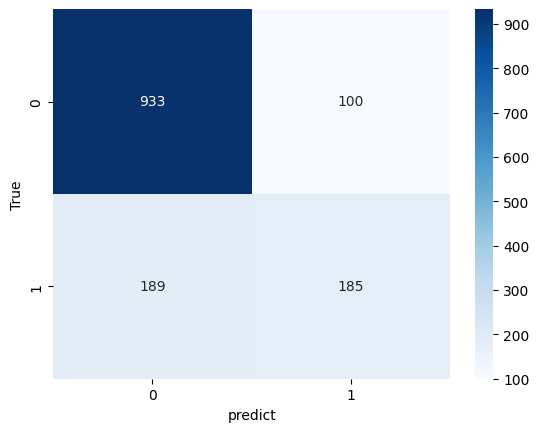

In [16]:
y_pred_1 = pipeline_1.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_1))

cm = confusion_matrix(y_test , y_pred_1)
sn.heatmap(cm,annot = True , fmt = 'd', cmap ='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.show()